# 버거지수 프로젝트

> 데이터: https://www.data.go.kr/data/15083033/fileData.do (주기적으로 업데이트 됨)

- 버거지수? '한 도시의 발전 수준은 (버거킹의 개+맥도날드의 개수+KFC의 개수)/롯데리아의 개수를 계산하여 높게 나올수록 더 발전된 도시라고 할 수 있다' 라는 트위터 게시물(@RioterOfMiku)이 올라오며 .. 도시 발전 지수..
- 실제로 이 버거지수가 유효한지에 대해 python과 pandas, python라이브러리를 활용해서 직접 구현해보자!

- 공공데이터 파일을 구글 드라이브에서 관리하기(colab 에서 할때)

<배운 것>

- 상관계수는 1에 가까울수록 높은 상관 관계를 가진다!

# 라이브러리 로드

In [1]:
# 시각화 할 때 한글 폰트 사용 가능

In [3]:
! pip install koreanize-matplotlib
! pip install seaborn

     ------------------------------------- 288.2/288.2 kB 18.5 MB/s eta 0:00:00


In [4]:
import pandas as pd
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt

from glob import glob

In [5]:
# glob : 규칙에 따라 파일 목록을 불러옴

file_names = glob('data/*.csv')
file_names

['data\\소상공인시장진흥공단_상가(상권)정보_강원_202209.csv',
 'data\\소상공인시장진흥공단_상가(상권)정보_경기_202209.csv',
 'data\\소상공인시장진흥공단_상가(상권)정보_경남_202209.csv',
 'data\\소상공인시장진흥공단_상가(상권)정보_경북_202209.csv',
 'data\\소상공인시장진흥공단_상가(상권)정보_광주_202209.csv',
 'data\\소상공인시장진흥공단_상가(상권)정보_대구_202209.csv',
 'data\\소상공인시장진흥공단_상가(상권)정보_대전_202209.csv',
 'data\\소상공인시장진흥공단_상가(상권)정보_부산_202209.csv',
 'data\\소상공인시장진흥공단_상가(상권)정보_서울_202209.csv',
 'data\\소상공인시장진흥공단_상가(상권)정보_세종_202209.csv',
 'data\\소상공인시장진흥공단_상가(상권)정보_울산_202209.csv',
 'data\\소상공인시장진흥공단_상가(상권)정보_인천_202209.csv',
 'data\\소상공인시장진흥공단_상가(상권)정보_전남_202209.csv',
 'data\\소상공인시장진흥공단_상가(상권)정보_전북_202209.csv',
 'data\\소상공인시장진흥공단_상가(상권)정보_제주_202209.csv',
 'data\\소상공인시장진흥공단_상가(상권)정보_충남_202209.csv',
 'data\\소상공인시장진흥공단_상가(상권)정보_충북_202209.csv']

In [9]:
# 반복문을 사용하여 전체 파일 로드

In [6]:
pd.read_csv(file_names[0]) # read_csv 파일 읽어올 수 있음

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,25033300,동그라미중고타이어,NaN,D,소매,D23,자동차/자동차용품,D23A04,타이어판매,G45211,...,4215011100110960006010791,NaN,"강원도 강릉시 가작로 270, (포남동)",210954,25488,1,NaN,NaN,128.904472,37.770252
1,17174549,세인트존스호텔Ohcrab,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,...,4215011300100010001017124,세인트존스호텔,"강원도 강릉시 창해로 307, (강문동)",210120,25467,NaN,NaN,NaN,128.920908,37.791299
2,17174079,평창라마다호텔,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,...,4276038024102450036000001,NaN,"강원도 평창군 대관령면 오목길 107, (횡계리)",232954,25342,NaN,NaN,NaN,128.717971,37.660051
3,17173904,호텔탑스텐스카이라운지,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,...,4215035029100920001000002,NaN,"강원도 강릉시 옥계면 헌화로 455-34, (금진리)",210831,25633,NaN,NaN,NaN,129.052902,37.654680
4,24412526,레이디가구,NaN,D,소매,D15,가구소매,D15A01,일반가구소매,G47520,...,4213011500111400020035715,NaN,"강원도 원주시 송삼길 156-19, (무실동)",220150,26385,NaN,NaN,NaN,127.917307,37.327668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108394,18767035,빽다방,철원동송점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,4278025921106800093022773,다이아나,"강원도 철원군 동송읍 금학로218번길 2, (이평리)",269816,24015,NaN,1,NaN,127.218438,38.208149
108395,18756448,프로타이어매장,NaN,F,생활서비스,F14,자동차/이륜차,F14A01,자동차정비/카센타,NaN,...,4281025021003240010008893,NaN,"강원도 인제군 인제읍 인제로 155, (상동리)",252806,24625,NaN,NaN,NaN,128.167905,38.067175
108396,18761043,피투에이치,NaN,F,생활서비스,F01,이/미용/건강,F01A01,여성미용실,S96112,...,4217010100008500000007575,삼양골드3차상가,"강원도 동해시 중앙로 248, (천곡동)",240812,25769,상가,5,NaN,129.114511,37.522807
108397,18755510,미르건축,NaN,F,생활서비스,F15,주택수리,F15A07,조립칸막이/파티션,F42499,...,4213011200107650027010109,NaN,"강원도 원주시 새동네4길 4-1, (태장동)",220966,26326,NaN,NaN,NaN,127.955352,37.355731


In [7]:
len(file_names)

17

In [8]:
# 전국 데이터를 볼거니까 데이터를 하나로 합쳐주기!

df_list = []
for file_path in file_names:
    df_temp = pd.read_csv(file_path, low_memory=False) # low_memory 데이터 타입 섞였을 경우 미리 지정해서..
    df_list.append(df_temp)

In [9]:
# 하나의 데이터 프레임으로 합치기 > concat

df = pd.concat(df_list)
df.shape

(2446771, 39)

In [10]:
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,25033300,동그라미중고타이어,NaN,D,소매,D23,자동차/자동차용품,D23A04,타이어판매,G45211,...,4215011100110960006010791,NaN,"강원도 강릉시 가작로 270, (포남동)",210954.0,25488,1,NaN,NaN,128.904472,37.770252
1,17174549,세인트존스호텔Ohcrab,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,...,4215011300100010001017124,세인트존스호텔,"강원도 강릉시 창해로 307, (강문동)",210120.0,25467,NaN,NaN,NaN,128.920908,37.791299
2,17174079,평창라마다호텔,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,...,4276038024102450036000001,NaN,"강원도 평창군 대관령면 오목길 107, (횡계리)",232954.0,25342,NaN,NaN,NaN,128.717971,37.660051
3,17173904,호텔탑스텐스카이라운지,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,...,4215035029100920001000002,NaN,"강원도 강릉시 옥계면 헌화로 455-34, (금진리)",210831.0,25633,NaN,NaN,NaN,129.052902,37.654680
4,24412526,레이디가구,NaN,D,소매,D15,가구소매,D15A01,일반가구소매,G47520,...,4213011500111400020035715,NaN,"강원도 원주시 송삼길 156-19, (무실동)",220150.0,26385,NaN,NaN,NaN,127.917307,37.327668


In [11]:
df.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
94167,18759758,올나노,충주점,F,생활서비스,F02,세탁/가사서비스,F02A05,청소/소독,NaN,...,4377035029104150000000001,NaN,"충청북도 음성군 삼성면 대덕로 138-38, (대정리)",369831.0,27648,NaN,NaN,NaN,127.518699,37.025560
94168,18753428,스테이퓨전바,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,4311110900102270029047521,NaN,"충청북도 청주시 상당구 무심동로390번길 15, (서문동)",360130.0,28528,NaN,2,NaN,127.484757,36.634341
94169,18769189,백마탁송대리서비스,NaN,D,소매,D02,선물/팬시/기념품,D02A02,꽃집/꽃배달,G47851,...,4311311300108780000009545,NaN,"충청북도 청주시 흥덕구 풍년로198번길 56-1, (가경동)",361800.0,28389,NaN,1,NaN,127.432312,36.631408
94170,18768587,구제언니,NaN,D,소매,D05,의복의류,D05A07,셔츠/내의/속옷,NaN,...,4311311400120810000012970,NaN,"충청북도 청주시 흥덕구 풍산로118번길 27-1, (복대동)",361814.0,28605,NaN,NaN,NaN,127.443014,36.628061
94171,18762532,엠모터스,NaN,D,소매,D23,자동차/자동차용품,D23A08,중고타이어판매,G45220,...,4375033027103230005026907,NaN,"충청북도 진천군 문백면 문진로 491, (봉죽리)",365861.0,27869,NaN,NaN,NaN,127.434572,36.784046


In [12]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2446771 entries, 0 to 94171
Data columns (total 39 columns):
 #   Column     Dtype  
---  ------     -----  
 0   상가업소번호     int64  
 1   상호명        object 
 2   지점명        object 
 3   상권업종대분류코드  object 
 4   상권업종대분류명   object 
 5   상권업종중분류코드  object 
 6   상권업종중분류명   object 
 7   상권업종소분류코드  object 
 8   상권업종소분류명   object 
 9   표준산업분류코드   object 
 10  표준산업분류명    object 
 11  시도코드       int64  
 12  시도명        object 
 13  시군구코드      int64  
 14  시군구명       object 
 15  행정동코드      int64  
 16  행정동명       object 
 17  법정동코드      int64  
 18  법정동명       object 
 19  지번코드       int64  
 20  대지구분코드     int64  
 21  대지구분명      object 
 22  지번본번지      int64  
 23  지번부번지      float64
 24  지번주소       object 
 25  도로명코드      int64  
 26  도로명        object 
 27  건물본번지      int64  
 28  건물부번지      float64
 29  건물관리번호     object 
 30  건물명        object 
 31  도로명주소      object 
 32  구우편번호      float64
 33  신우편번호      int64  
 34  동정보        object 
 

# 전처리

In [14]:
# 사용할 컬럼만 남기기

df = df[['상호명', '상권업종대분류명', '시도명', '시군구명', '도로명주소', '경도', '위도']].copy() # 깊은 복사 - 원본 영향x
df.shape

(2446771, 7)

In [15]:
df # '상호명'을 통해 어떤 상점인지 파악하고, 관련된 데이터 추출! 도시명은 '시도명', '시군구명' 등을 파악 / '상권업종대분류명'을 통해 해당 업종이 맞는지 확인 작업

,상호명,상권업종대분류명,시도명,시군구명,도로명주소,경도,위도
0,동그라미중고타이어,소매,강원도,강릉시,"강원도 강릉시 가작로 270, (포남동)",128.904472,37.770252
1,세인트존스호텔Ohcrab,숙박,강원도,강릉시,"강원도 강릉시 창해로 307, (강문동)",128.920908,37.791299
2,평창라마다호텔,숙박,강원도,평창군,"강원도 평창군 대관령면 오목길 107, (횡계리)",128.717971,37.660051
3,호텔탑스텐스카이라운지,숙박,강원도,강릉시,"강원도 강릉시 옥계면 헌화로 455-34, (금진리)",129.052902,37.654680
4,레이디가구,소매,강원도,원주시,"강원도 원주시 송삼길 156-19, (무실동)",127.917307,37.327668
...,...,...,...,...,...,...,...
94167,올나노,생활서비스,충청북도,음성군,"충청북도 음성군 삼성면 대덕로 138-38, (대정리)",127.518699,37.025560
94168,스테이퓨전바,음식,충청북도,청주시,"충청북도 청주시 상당구 무심동로390번길 15, (서문동)",127.484757,36.634341
94169,백마탁송대리서비스,소매,충청북도,청주시,"충청북도 청주시 흥덕구 풍년로198번길 56-1, (가경동)",127.432312,36.631408
94170,구제언니,소매,충청북도,청주시,"충청북도 청주시 흥덕구 풍산로118번길 27-1, (복대동)",127.443014,36.628061


In [16]:
df.info() # 컬럼 줄여줘서 메모리 크기도 많이 줄음!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2446771 entries, 0 to 94171
Data columns (total 7 columns):
 #   Column    Dtype  
---  ------    -----  
 0   상호명       object 
 1   상권업종대분류명  object 
 2   시도명       object 
 3   시군구명      object 
 4   도로명주소     object 
 5   경도        float64
 6   위도        float64
dtypes: float64(2), object(5)
memory usage: 149.3+ MB


In [17]:
# 상호명이 없는 데이터 제거

df = df[df['상호명'].notnull()].copy()
df.shape

(2446770, 7)

In [18]:
# 상호명의 영문을 대문자로 변경

df['상호명_대문자'] = df['상호명'].str.upper() # kfc, KFC

In [19]:
# BMKL(버거킹, 맥도날드, kfc, 롯데리아) 추출

burger = ['버거킹', '맥도날드', 'KFC', '롯데리아']
burger

['버거킹', '맥도날드', 'KFC', '롯데리아']

In [20]:
df = df[df['상호명_대문자'].str.contains('버거킹|Burger|맥도날드|멕도날드|롯데리아|KFC|케이에프씨')]

In [21]:
df.shape

(2103, 8)

In [22]:
df['상호명'].unique()[:50]

array(['버거킹', '롯데리아', '케이에프씨원주단계', '맥도날드', 'KFC원주단계DT점', '케이에프씨춘천석사',
       'KFC', '롯데리아문막휴게소강릉방면', 'BKR버거킹', '문막휴게소롯데리아', '맥도날드동해DT점',
       'KFC춘천이마트점', '버거킹춘천거두GS점', '케이에프씨춘천이마트', '한국맥도날드춘천후평DT점춘천후평DT점',
       '롯데리아고성간성점', '에스알에스KFC현대성우', '롯데리아익스프레스점', '한국맥도날드강릉올림픽파크레스토랑점',
       '롯데리아혁신도시점', '에이치케이라온롯데리아롯데마트', '신맥맥도날드원주', '롯데리아원주일산점',
       '문막휴게소강릉방향롯데리아', '한국맥도날드춘천후평DT점', '한국맥도날드원주단계DT', '한국맥도날드춘천퇴계DT점',
       '버거킹오션월드', '하나로마트롯데리아', '맥도날드이천점', '롯데리아여주휴게소인천방면', '용인보정KFC',
       '맥도날드마석점', '버거킹여주휴게소강릉방면', 'KFC서현역점', '롯데리아산본중앙', '용인상현KFC',
       '맥도날드수원세류DT점', 'KFC정자역점정자역점', 'KFC야탑역점', '맥도날드이천아미점', '롯데리아호원점',
       'KFC용인명지DT점', '롯데리아수원연무점', '버거킹평택서정점', 'SRSKFC수원역사', 'SRSKFC부천역',
       'SRSKFC분당월드쇼핑', 'SRSKFC', '롯데리아경기대역점'], dtype=object)

In [23]:
df['상호명_대문자'].str.contains('롯데리아')

2699     False
3162      True
6156     False
8195     False
8275     False
         ...  
72250     True
73850     True
74844     True
78041    False
85321     True
Name: 상호명_대문자, Length: 2103, dtype: bool

In [24]:
df[df['상호명_대문자'].str.contains('롯데리아')] # 롯데리아만 관련된 데이터만 가져옴

,상호명,상권업종대분류명,시도명,시군구명,도로명주소,경도,위도,상호명_대문자
3162,롯데리아,음식,강원도,원주시,"강원도 원주시 지정면 오크밸리2길 58, (월송리)",127.808946,37.407858,롯데리아
12270,롯데리아,음식,강원도,속초시,"강원도 속초시 설악산로 1042, (설악동)",128.488773,38.173973,롯데리아
13597,롯데리아,음식,강원도,정선군,"강원도 정선군 정선읍 병방치길 235, (북실리)",128.634789,37.363390,롯데리아
14072,롯데리아,음식,강원도,화천군,"강원도 화천군 화천읍 중앙로 16-1, (하리)",127.705846,38.104345,롯데리아
15690,롯데리아,음식,강원도,양양군,"강원도 양양군 양양읍 양양로 15-1, (연창리)",128.626417,38.077933,롯데리아
...,...,...,...,...,...,...,...,...
72059,롯데리아칠금점,음식,충청북도,청주시,"충청북도 청주시 서원구 1순환로1137번길 19, (분평동, 분평주공6단지)",127.490569,36.607474,롯데리아칠금점
72250,롯데리아,음식,충청북도,충주시,"충청북도 충주시 수안보면 주정산로 183, (온천리)",127.975854,36.849507,롯데리아
73850,롯데리아,음식,충청북도,청주시,"충청북도 청주시 서원구 내수동로 116, (사창동)",127.460250,36.633746,롯데리아
74844,롯데리아,음식,충청북도,제천시,"충청북도 제천시 풍양로13길 5, (중앙로1가)",128.210943,37.137848,롯데리아


In [25]:
df.loc[df['상호명_대문자'].str.contains('롯데리아'), '브랜드'] = '롯데리아'

In [26]:
df # 브랜드 컬럼이 생김

,상호명,상권업종대분류명,시도명,시군구명,도로명주소,경도,위도,상호명_대문자,브랜드
2699,버거킹,음식,강원도,홍천군,"강원도 홍천군 서면 한치골길 262, (팔봉리)",127.687273,37.652324,버거킹,NaN
3162,롯데리아,음식,강원도,원주시,"강원도 원주시 지정면 오크밸리2길 58, (월송리)",127.808946,37.407858,롯데리아,롯데리아
6156,케이에프씨원주단계,음식,강원도,원주시,"강원도 원주시 북원로 2266, (단계동)",127.934373,37.348017,케이에프씨원주단계,NaN
8195,맥도날드,음식,강원도,속초시,"강원도 속초시 동해대로 4118, (조양동)",128.583904,38.189882,맥도날드,NaN
8275,맥도날드,음식,강원도,원주시,"강원도 원주시 서원대로 154, (단계동)",127.928180,37.344175,맥도날드,NaN
...,...,...,...,...,...,...,...,...,...
72250,롯데리아,음식,충청북도,충주시,"충청북도 충주시 수안보면 주정산로 183, (온천리)",127.975854,36.849507,롯데리아,롯데리아
73850,롯데리아,음식,충청북도,청주시,"충청북도 청주시 서원구 내수동로 116, (사창동)",127.460250,36.633746,롯데리아,롯데리아
74844,롯데리아,음식,충청북도,제천시,"충청북도 제천시 풍양로13길 5, (중앙로1가)",128.210943,37.137848,롯데리아,롯데리아
78041,버거킹,음식,충청북도,음성군,"충청북도 음성군 맹동면 대하2가길 11, (두성리)",127.542769,36.907964,버거킹,NaN


In [27]:
burger

['버거킹', '맥도날드', 'KFC', '롯데리아']

In [28]:
for bname in burger:
    df.loc[df['상호명_대문자'].str.contains(bname), '브랜드'] = bname

In [29]:
df.loc[df['상호명_대문자'].str.contains('케이에프씨'), '브랜드'] = 'KFC'
df.loc[df['상호명_대문자'].str.contains('멕도날드'), '브랜드'] = '맥도날드'

In [30]:
df

,상호명,상권업종대분류명,시도명,시군구명,도로명주소,경도,위도,상호명_대문자,브랜드
2699,버거킹,음식,강원도,홍천군,"강원도 홍천군 서면 한치골길 262, (팔봉리)",127.687273,37.652324,버거킹,버거킹
3162,롯데리아,음식,강원도,원주시,"강원도 원주시 지정면 오크밸리2길 58, (월송리)",127.808946,37.407858,롯데리아,롯데리아
6156,케이에프씨원주단계,음식,강원도,원주시,"강원도 원주시 북원로 2266, (단계동)",127.934373,37.348017,케이에프씨원주단계,KFC
8195,맥도날드,음식,강원도,속초시,"강원도 속초시 동해대로 4118, (조양동)",128.583904,38.189882,맥도날드,맥도날드
8275,맥도날드,음식,강원도,원주시,"강원도 원주시 서원대로 154, (단계동)",127.928180,37.344175,맥도날드,맥도날드
...,...,...,...,...,...,...,...,...,...
72250,롯데리아,음식,충청북도,충주시,"충청북도 충주시 수안보면 주정산로 183, (온천리)",127.975854,36.849507,롯데리아,롯데리아
73850,롯데리아,음식,충청북도,청주시,"충청북도 청주시 서원구 내수동로 116, (사창동)",127.460250,36.633746,롯데리아,롯데리아
74844,롯데리아,음식,충청북도,제천시,"충청북도 제천시 풍양로13길 5, (중앙로1가)",128.210943,37.137848,롯데리아,롯데리아
78041,버거킹,음식,충청북도,음성군,"충청북도 음성군 맹동면 대하2가길 11, (두성리)",127.542769,36.907964,버거킹,버거킹


In [31]:
df[['상호명', '브랜드']]

,상호명,브랜드
2699,버거킹,버거킹
3162,롯데리아,롯데리아
6156,케이에프씨원주단계,KFC
8195,맥도날드,맥도날드
8275,맥도날드,맥도날드
...,...,...
72250,롯데리아,롯데리아
73850,롯데리아,롯데리아
74844,롯데리아,롯데리아
78041,버거킹,버거킹


In [32]:
df.loc[df['상호명_대문자'].str.contains('멕도날드'), ['상호명', '브랜드']]

,상호명,브랜드


In [33]:
df.loc[df['상호명_대문자'].str.contains('맥도날드'), ['상호명', '브랜드']]

,상호명,브랜드
8195,맥도날드,맥도날드
8275,맥도날드,맥도날드
12898,맥도날드,맥도날드
22716,맥도날드동해DT점,맥도날드
30837,한국맥도날드춘천후평DT점춘천후평DT점,맥도날드
...,...,...
23781,맥도날드,맥도날드
46125,맥도날드율량지에스,맥도날드
66536,맥도날드,맥도날드
70408,맥도날드,맥도날드


In [34]:
df.loc[df['상호명_대문자'].str.contains('버거킹'), ['상호명', '브랜드']]

,상호명,브랜드
2699,버거킹,버거킹
11958,버거킹,버거킹
18684,BKR버거킹,버거킹
22164,버거킹,버거킹
27793,버거킹춘천거두GS점,버거킹
...,...,...
17936,버거킹,버거킹
22806,버거킹청주오송점,버거킹
23076,버거킹,버거킹
64341,버거킹,버거킹


# 브랜드별 매장수

<AxesSubplot: >

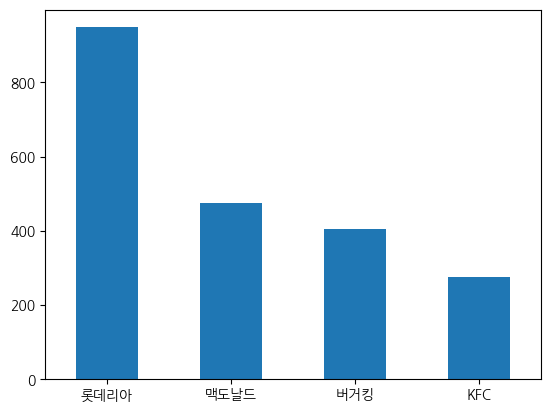

In [35]:
df['브랜드'].value_counts().plot.bar(rot=0) # 빈도수 / rot : x축값. 글씨 요소 회전

<AxesSubplot: >

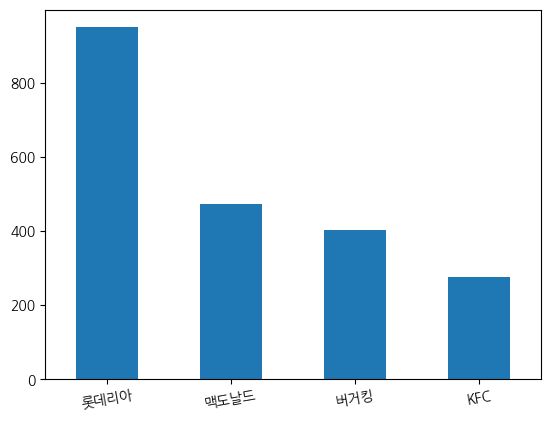

In [36]:
df['브랜드'].value_counts().plot.bar(rot=10) # rot 실험..ㅎㅎ

# 전국 시도별 상호수와 버거지수

In [37]:
df.groupby(['시도명', '브랜드'])['상호명'].count() # 시도명, 브랜드 기준으로 그룹화,그 그룹에 해당하는 상호명이 몇개인지 count로 셀 수 있음 

시도명   브랜드 
강원도   KFC     10
      롯데리아    39
      맥도날드    11
      버거킹     11
경기도   KFC     78
              ..
충청남도  버거킹      6
충청북도  KFC      5
      롯데리아    38
      맥도날드    10
      버거킹      7
Name: 상호명, Length: 67, dtype: int64

In [38]:
df.groupby(['시도명', '브랜드'])['상호명'].count().unstack() # 마지막 인덱스에 있었던 값을 컬럼으로 올라옴.

# 위에는 브랜드명이 인덱스 값으로 되어 있는데, unstack하는 순간 마지막 인덱스 값이 컬럼으로 올라옴!

브랜드,KFC,롯데리아,맥도날드,버거킹
시도명,,,,
강원도,10.0,39.0,11.0,11.0
경기도,78.0,231.0,103.0,97.0
경상남도,7.0,64.0,33.0,22.0
경상북도,9.0,48.0,16.0,22.0
광주광역시,9.0,34.0,14.0,10.0
대구광역시,13.0,44.0,30.0,19.0
대전광역시,10.0,40.0,17.0,19.0
부산광역시,13.0,51.0,55.0,21.0
서울특별시,94.0,128.0,100.0,117.0


In [39]:
# NaN값들이 생김. >> 0을 넣어주자!(여기에는 매장이 없다)

df.groupby(['시도명', '브랜드'])['상호명'].count().unstack().fillna(0)

브랜드,KFC,롯데리아,맥도날드,버거킹
시도명,,,,
강원도,10.0,39.0,11.0,11.0
경기도,78.0,231.0,103.0,97.0
경상남도,7.0,64.0,33.0,22.0
경상북도,9.0,48.0,16.0,22.0
광주광역시,9.0,34.0,14.0,10.0
대구광역시,13.0,44.0,30.0,19.0
대전광역시,10.0,40.0,17.0,19.0
부산광역시,13.0,51.0,55.0,21.0
서울특별시,94.0,128.0,100.0,117.0


In [40]:
# 소수점 없애기 - 데이터타입 지정 astype(int)

df.groupby(['시도명', '브랜드'])['상호명'].count().unstack().fillna(0).astype(int)

브랜드,KFC,롯데리아,맥도날드,버거킹
시도명,,,,
강원도,10,39,11,11
경기도,78,231,103,97
경상남도,7,64,33,22
경상북도,9,48,16,22
광주광역시,9,34,14,10
대구광역시,13,44,30,19
대전광역시,10,40,17,19
부산광역시,13,51,55,21
서울특별시,94,128,100,117


In [41]:
# 위에 과정을 합친거!

df_skorea = df.groupby(['시도명', '브랜드'])['상호명'].count().unstack().fillna(0).astype(int)

df_skorea['합계'] = df_skorea.sum(axis=1) # 행을 기준으로 다 합쳐줌 > '합계'라는 파생변수 만들어줌(위에 브랜드 칼럼, 파생변수 만든 것처럼)
df_skorea

브랜드,KFC,롯데리아,맥도날드,버거킹,합계
시도명,,,,,
강원도,10,39,11,11,71
경기도,78,231,103,97,509
경상남도,7,64,33,22,126
경상북도,9,48,16,22,95
광주광역시,9,34,14,10,67
대구광역시,13,44,30,19,106
대전광역시,10,40,17,19,86
부산광역시,13,51,55,21,140
서울특별시,94,128,100,117,439


In [42]:
# 버거킹의 개수+맥도날드의 개수+KFC의 개수 / 롯데리아 개수

df_skorea['버거지수'] = (df_skorea['버거킹'] + df_skorea['맥도날드'] + df_skorea['KFC']) / df_skorea['롯데리아']

df_skorea

브랜드,KFC,롯데리아,맥도날드,버거킹,합계,버거지수
시도명,,,,,,
강원도,10,39,11,11,71,0.820513
경기도,78,231,103,97,509,1.203463
경상남도,7,64,33,22,126,0.968750
경상북도,9,48,16,22,95,0.979167
광주광역시,9,34,14,10,67,0.970588
대구광역시,13,44,30,19,106,1.409091
대전광역시,10,40,17,19,86,1.150000
부산광역시,13,51,55,21,140,1.745098
서울특별시,94,128,100,117,439,2.429688


# 지도에 표현 - 시도별 위도, 경도 평균값

In [43]:
df_city_latlong = df.groupby(['시도명']).agg({'위도' : 'mean', '경도' : 'mean'})
df_city_latlong

,위도,경도
시도명,,
강원도,37.691171,128.122782
경기도,37.423451,127.020033
경상남도,35.199341,128.565483
경상북도,36.155912,128.838849
광주광역시,35.163187,126.869270
대구광역시,35.857197,128.583225
대전광역시,36.349595,127.389747
부산광역시,35.169575,129.067981
서울특별시,37.545011,126.996950


In [44]:
df_skorea_latlong = df_city_latlong.join(df_skorea) # df_city_latlong에 df_skorea 합치기
df_skorea_latlong # 같은 인덱스 값끼리 맵핑해줌!

,위도,경도,KFC,롯데리아,맥도날드,버거킹,합계,버거지수
시도명,,,,,,,,
강원도,37.691171,128.122782,10,39,11,11,71,0.820513
경기도,37.423451,127.020033,78,231,103,97,509,1.203463
경상남도,35.199341,128.565483,7,64,33,22,126,0.968750
경상북도,36.155912,128.838849,9,48,16,22,95,0.979167
광주광역시,35.163187,126.869270,9,34,14,10,67,0.970588
대구광역시,35.857197,128.583225,13,44,30,19,106,1.409091
대전광역시,36.349595,127.389747,10,40,17,19,86,1.150000
부산광역시,35.169575,129.067981,13,51,55,21,140,1.745098
서울특별시,37.545011,126.996950,94,128,100,117,439,2.429688


In [45]:
# 시군구별 상호수

df_dist_count = df.groupby(['시도명','시군구명','브랜드'])['상호명'].count().unstack().fillna(0).astype(int) # ['시도명','시군구명','브랜드'] 멀티인덱스 > 2개일때보다 더 세부적으로 값을 구할 수 있음 > 시군구 단위로 더 나눠서 볼 수 있다
df_dist_count['합계'] = df_dist_count.sum(axis=1)
df_dist_count

브랜드        KFC  롯데리아  맥도날드  버거킹  합계
시도명  시군구명                          
강원도  강릉시     0     4     2    1   7
     고성군     0     1     0    0   1
     동해시     0     0     1    1   2
     속초시     0     4     1    1   6
     양구군     0     1     0    0   1
...        ...   ...   ...  ...  ..
충청북도 음성군     0     3     0    1   4
     제천시     0     2     1    0   3
     증평군     0     1     0    0   1
     청주시     5    24     8    6  43
     충주시     0     4     1    0   5

[203 rows x 5 columns]

In [46]:
# 더 세부적인 시군구별 버거지수 확인

df_dist_count['버거지수'] = (df_dist_count['버거킹'] + df_dist_count['맥도날드'] + df_dist_count['KFC']) / df_dist_count['롯데리아']
df_dist_count

브랜드        KFC  롯데리아  맥도날드  버거킹  합계      버거지수
시도명  시군구명                                    
강원도  강릉시     0     4     2    1   7  0.750000
     고성군     0     1     0    0   1  0.000000
     동해시     0     0     1    1   2       inf
     속초시     0     4     1    1   6  0.500000
     양구군     0     1     0    0   1  0.000000
...        ...   ...   ...  ...  ..       ...
충청북도 음성군     0     3     0    1   4  0.333333
     제천시     0     2     1    0   3  0.500000
     증평군     0     1     0    0   1  0.000000
     청주시     5    24     8    6  43  0.791667
     충주시     0     4     1    0   5  0.250000

[203 rows x 6 columns]

In [ ]:
# 시도, 시군구별 빈도

In [47]:
# groupby로 구한 값
df_skorea.head()

브랜드,KFC,롯데리아,맥도날드,버거킹,합계,버거지수
시도명,,,,,,
강원도,10,39,11,11,71,0.820513
경기도,78,231,103,97,509,1.203463
경상남도,7,64,33,22,126,0.968750
경상북도,9,48,16,22,95,0.979167
광주광역시,9,34,14,10,67,0.970588


In [48]:
# groupby, pivot table로 구할 수 있는 값을  crosstab을 사용하여 매장수(빈도수) 구하기
city_burger = pd.crosstab(df['시도명'], df['브랜드']) # 인덱스에는 '시도명', 컬럼에는 '브랜드'
city_burger

브랜드,KFC,롯데리아,맥도날드,버거킹
시도명,,,,
강원도,10,39,11,11
경기도,78,231,103,97
경상남도,7,64,33,22
경상북도,9,48,16,22
광주광역시,9,34,14,10
대구광역시,13,44,30,19
대전광역시,10,40,17,19
부산광역시,13,51,55,21
서울특별시,94,128,100,117


<AxesSubplot: xlabel='브랜드', ylabel='시도명'>

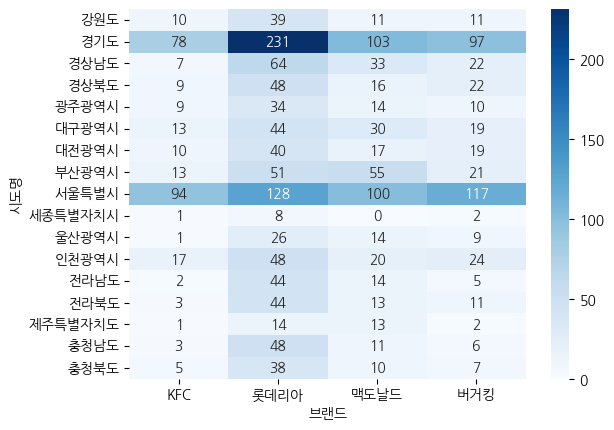

In [49]:
# 구한 값을 heatmpa을 통해서 확인해보자! - 시도별로 매장개수 어느정도 있는지!

sns.heatmap(city_burger, annot=True, fmt='.0f', cmap='Blues')

In [50]:
df_dist_count.head()

브랜드       KFC  롯데리아  맥도날드  버거킹  합계  버거지수
시도명 시군구명                                
강원도 강릉시     0     4     2    1   7  0.75
    고성군     0     1     0    0   1  0.00
    동해시     0     0     1    1   2   inf
    속초시     0     4     1    1   6  0.50
    양구군     0     1     0    0   1  0.00

In [51]:
burger

['버거킹', '맥도날드', 'KFC', '롯데리아']

In [52]:
# 인덱스 값이 '서울특별시'에 해당하는 burger(버거지수 제외한 kfc, 롯데리아, 맥, 버.. 얘네만 보고 싶다)

df_seoul_gu = df_dist_count.loc['서울특별시', burger]
df_seoul_gu

브랜드,버거킹,맥도날드,KFC,롯데리아
시군구명,,,,
강남구,14,11,15,7
강동구,6,3,2,7
강북구,2,4,3,4
강서구,4,5,6,6
관악구,4,1,3,4
광진구,4,2,2,9
구로구,4,4,1,2
금천구,1,6,2,4
노원구,3,5,7,4


<AxesSubplot: xlabel='브랜드', ylabel='시군구명'>

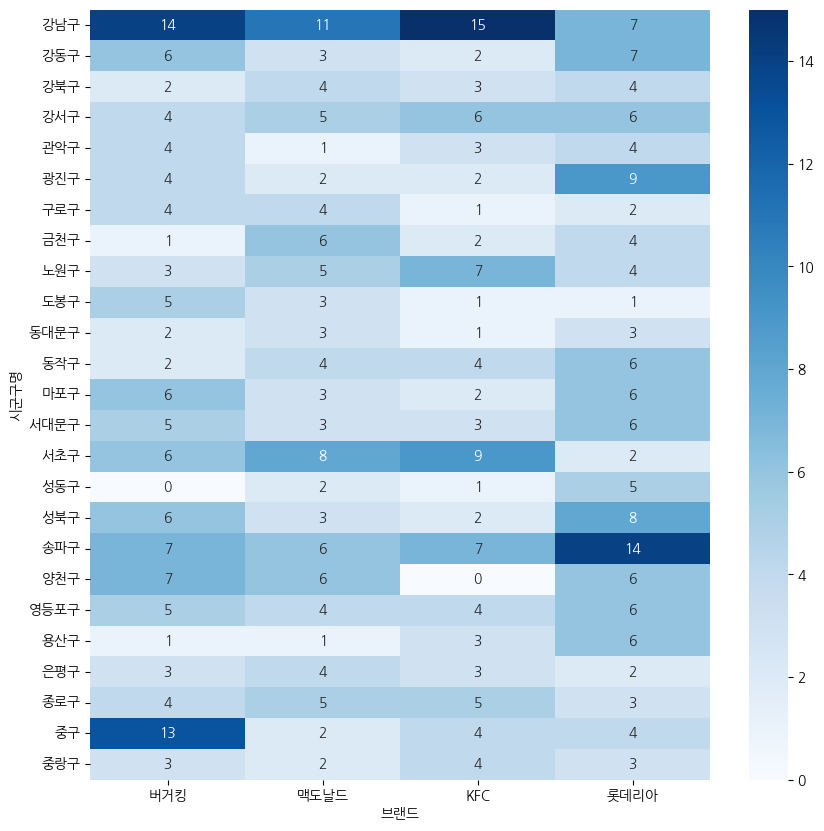

In [53]:
plt.figure(figsize=(10,10)) # 생략되는 구x
sns.heatmap(df_seoul_gu, cmap='Blues', annot=True)

# 시도별, 시군구별 상관계수 구하기

- 상관계수를 구해서 각각의 브랜드별로 어느 정도 상관이 있는지 보자.
- 피어슨 상관계수: (-1 ~ 1)의 값을 가짐. ex. 버거킹 매장이 많을수록 맥도날드 매장이 많다 >> 양의 상관을 가지게 되고, 1에 가까운 값을 가지게 된다!
- 1에 가까울수록 양의 상관에 가깝고, -1에 가까울수록 음의 상관에 가까운데, -1이라는 것은 값이 증가할수록 나머지 한 변에 있는 값은 감소한다.

In [54]:
# 전국

df_dist_count[burger].head()

브랜드       버거킹  맥도날드  KFC  롯데리아
시도명 시군구명                      
강원도 강릉시     1     2    0     4
    고성군     0     0    0     1
    동해시     1     1    0     0
    속초시     1     1    0     4
    양구군     0     0    0     1

# heatmap, pairplot으로 시각화하기

<AxesSubplot: xlabel='브랜드', ylabel='브랜드'>

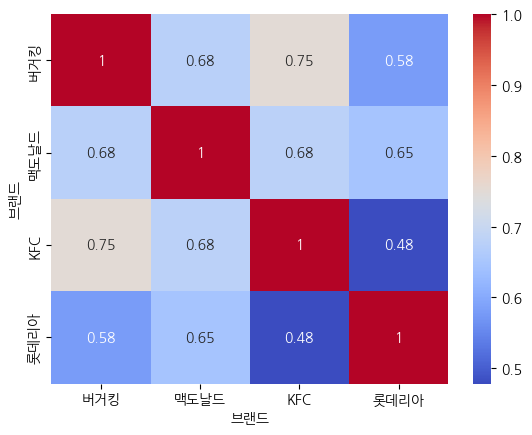

In [55]:
sns.heatmap(df_dist_count[burger].corr(), annot=True, cmap='coolwarm') # 브랜드별로 상관계수 나옴

<AxesSubplot: xlabel='브랜드', ylabel='브랜드'>

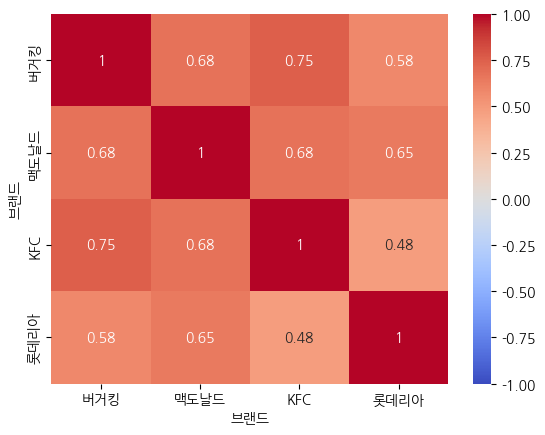

In [56]:
sns.heatmap(df_dist_count[burger].corr(), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1) # 버거킹,kfc 상관계수 비교적 높음
# 대부분 0.3~0.7 >> 뚜렷한 양적 선형관계임!

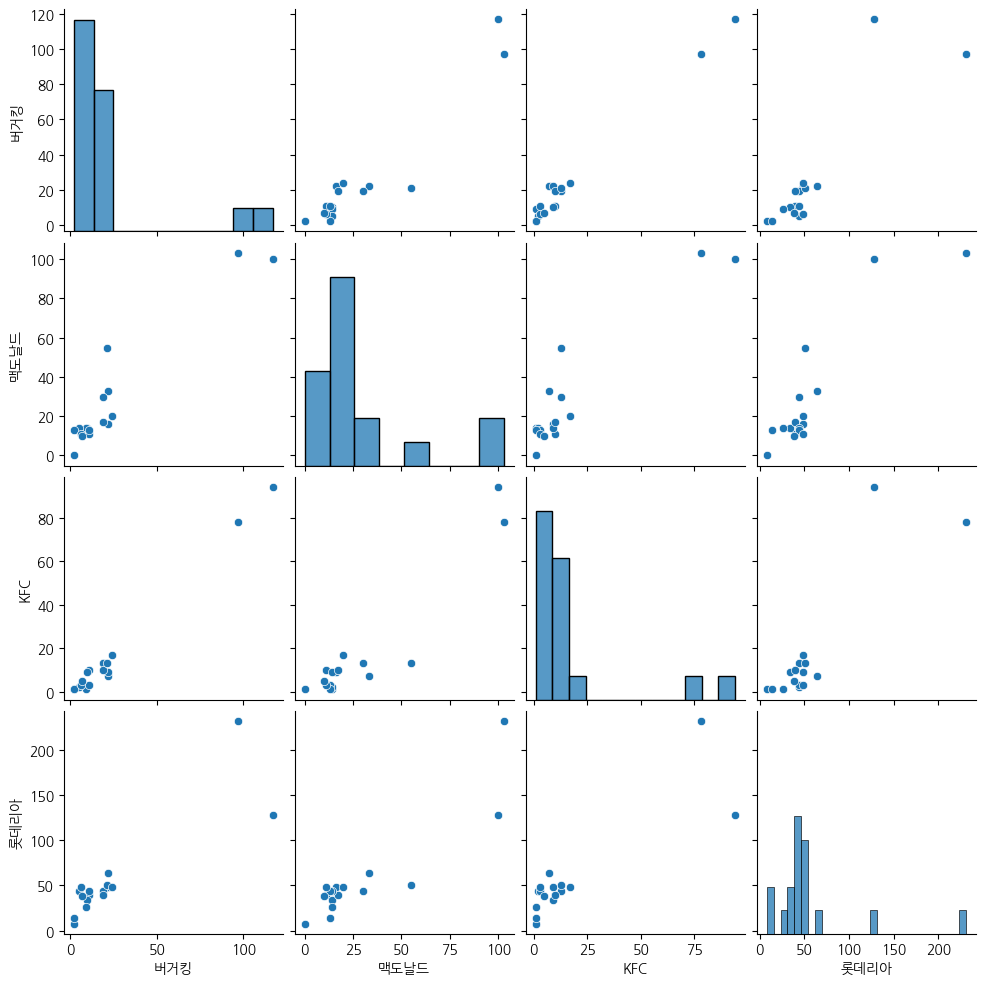

In [57]:
sns.pairplot(data=df_skorea[burger])

<AxesSubplot: xlabel='브랜드', ylabel='브랜드'>

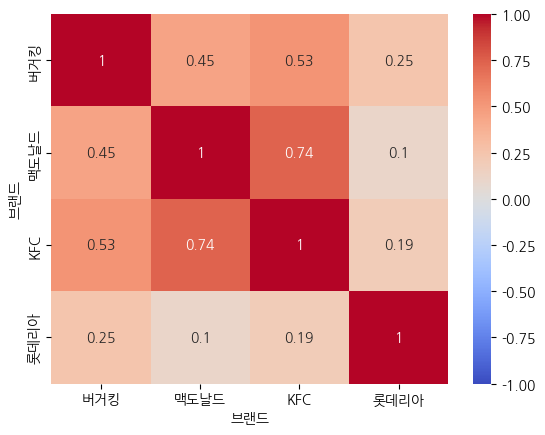

In [58]:
# 상관계수 서울

sns.heatmap(df_seoul_gu.corr(), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1) # 맥도날드&kfc, 버거킹&kfc

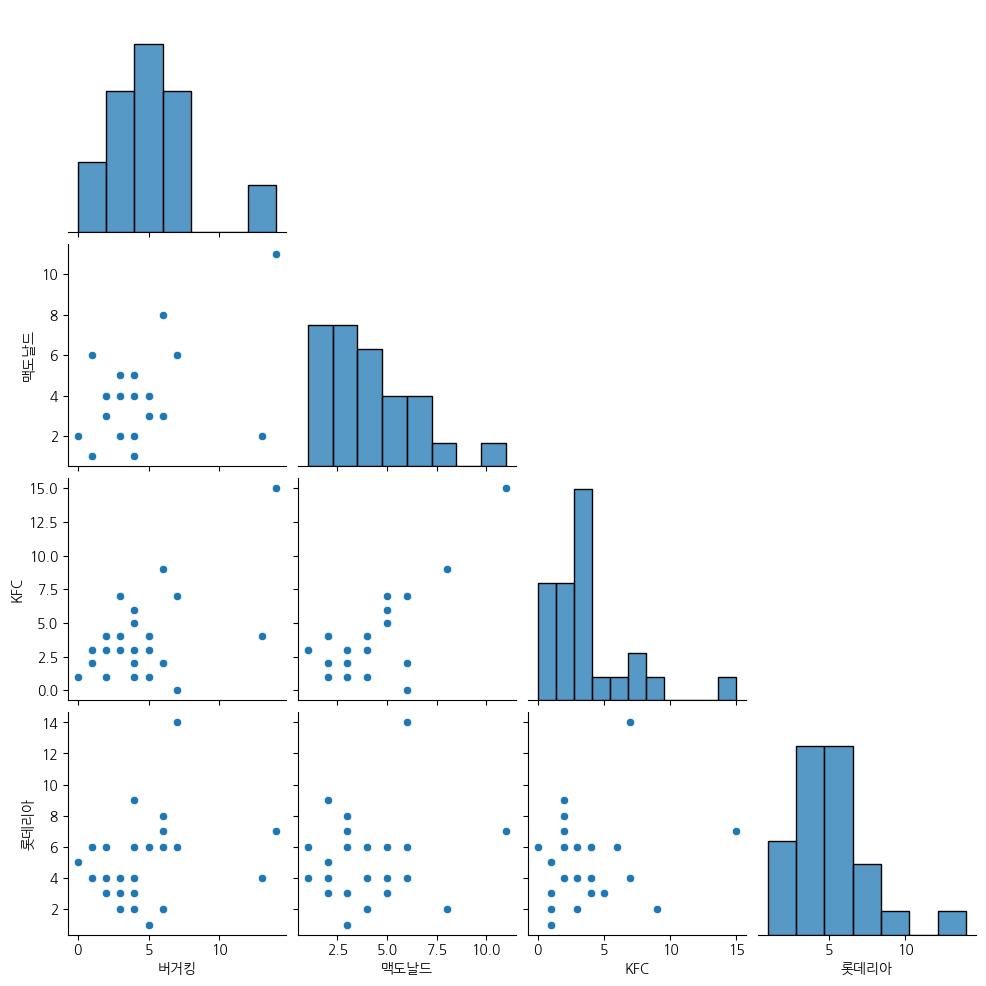

In [59]:
sns.pairplot(data=df_seoul_gu, corner=True) # 대부분 양적 선형관계임!

# Folium

- folium, plotly를 사용한 지도 시각화

In [62]:
! pip install folium

     ---------------------------------------- 96.5/96.5 kB ? eta 0:00:00


In [63]:
import folium

In [64]:
folium.Map()

In [65]:
folium.Map?

Init signature:
folium.Map(
    location=None,
    width='100%',
    height='100%',
    left='0%',
    top='0%',
    position='relative',
    tiles='OpenStreetMap',
    attr=None,
    min_zoom=0,
    max_zoom=18,
    zoom_start=10,
    min_lat=-90,
    max_lat=90,
    min_lon=-180,
    max_lon=180,
    max_bounds=False,
    crs='EPSG3857',
    control_scale=False,
    prefer_canvas=False,
    no_touch=False,
    disable_3d=False,
    png_enabled=False,
    zoom_control=True,
    **kwargs,
)
Docstring:     
Create a Map with Folium and Leaflet.js

Generate a base map of given width and height with either default
tilesets or a custom tileset URL. The following tilesets are built-in
to Folium. Pass any of the following to the "tiles" keyword:

    - "OpenStreetMap"
    - "Mapbox Bright" (Limited levels of zoom for free tiles)
    - "Mapbox Control Room" (Limited levels of zoom for free tiles)
    - "Stamen" (Terrain, Toner, and Watercolor)
    - "Cloudmade" (Must pass API key)
    - "Mapb

In [66]:
folium.Map(location=[45.523, -122.675]) # 특정 위도, 경도값이 중심이 됨

In [74]:
folium.Map(location=[45.523, -122.675], tiles='cartodb positron')  # 타일 설정을 통해 지도의 스타일 설정 가능

In [75]:
folium.Map(location=[45.523, -122.675], tiles='cartodb positron', zoom_start=6)  # 얼마나 지도를 확대할건지

In [71]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구한다 / 서울시에 있는 매장만 지도에 표시해보자

latlong = df.loc[df['시도명'] == '서울특별시', ['위도', '경도']].median().values
latlong

array([ 37.53904595, 127.01294119])

In [73]:
# 서울시에 있는 매장 정보만 먼저 출력해보자 - 서울특별시 데이터만 찾아서 다시 df로 감싸주면 boolean 값에 대해서 True 값으로 되어 있는 값들만 따로 인덱싱해서 가져옴

df_seoul = df[df['시도명'] == '서울특별시']
df_seoul.shape # 버거 매장이 439개

(439, 9)

In [78]:
f_map = folium.Map(latlong, zoom_start=12, tiles='Stamen Toner') # location에 latlong, 위도 경도 지정

for i in df_seoul.index:               # 439개 - 위도와 경도에 해당되는 상호를 표시. CircleMarker를 통해서 동그라미로 해당 매장 표시
    sub_lat = df_seoul.loc[i, '위도']
    sub_long = df_seoul.loc[i, '경도']
    
    brand = df_seoul.loc[i, '브랜드']
    title = f"{df_seoul.loc[i, '상호명']} - {df_seoul.loc[i, '도로명주소']}"
    color = {'롯데리아' : 'yellow', '버거킹' : 'blue', '맥도날드' : 'orange', 'KFC' : 'red'}
    
    folium.CircleMarker([sub_lat, sub_long],
                       radius=3,
                       color = color[brand],
                       tooltip=title).add_to(f_map)

In [79]:
f_map # 강남, 서울 도심가 쪽에 매장 몰려있고, 큰 도로 가까이 햄버거 매장들이 많이 있음. but 이걸보고 어디가 버거지수가 높은지 알기는 힘듦

# choropleth
- 버거지수를 구한 데이터를 choropleth map을 통해서 그려보자.
- choropleth map을 그리기 위해서는 위도, 경도 값에 대해서 시군구 값들을 표시해야 한다. 

In [80]:
seoul_url = 'https://github.com/southkorea/southkorea-maps/blob/master/kostat/2013/json/skorea_municipalities_geo.json'
print(seoul_url)

https://github.com/southkorea/southkorea-maps/blob/master/kostat/2013/json/skorea_municipalities_geo.json


In [91]:
from urllib.request import urlopen
import json

with r.urlopen(seoul_url) as response:
    ko_geojson = json.load(response)
    
ko_geojson['features']

JSONDecodeError: Expecting value: line 9 column 1 (char 8)